# Purpose of notebook
This notebook is to initially explore the data. 

Topics covered:
- loading data
- checking for null values
- checking basic categorial features for imbalances (wins, characters, maps, users)
- plotting histograms for all aggregate features
- coloring histograms by win/loss and 2 selected users

In [5]:
import pandas as pd

# Read the CSV files into separate DataFrames
df1 = pd.read_csv('clean_data_norm_round_allf_dev_data.csv')
df2 = pd.read_csv('clean_data_norm_round_allf_pro1_data.csv')
df3 = pd.read_csv('clean_data_norm_round_allf_pro2_data.csv')

# Concatenate the DataFrames vertically
df = pd.concat([df1, df2, df3], ignore_index=True)

df

,user_id,map,player,ally4_character,self_character,ally1_character,ally2_character,ally3_character,opponent5_character,opponent6_character,...,self_avg_ammo_reserve,self_total_firing_time,self_longest_gun_secondary,self_max_loadout_value,spike_planted,spike_time,self_total_ability_usage_1,self_total_ability_usage_2,self_total_ability_usage_3,self_total_ability_usage_4
0,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,24.000000,2200,none,3434.0,False,0,0,1,1,0
1,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,19.400000,8600,classic,5100.0,False,125000,1,0,1,1
2,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,18.222222,9800,classic,5100.0,True,278800,1,1,1,0
3,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,16.800000,7400,classic,5100.0,False,304600,1,0,1,0
4,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,14.142857,4400,classic,6750.0,False,369400,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28635,3795,unknown,0,breach,jett,skye,sova,reyna,jett,gekko,...,20.500000,2200,ghost,5100.0,False,1500672,1,0,1,0
28636,3795,unknown,0,breach,jett,skye,sova,reyna,jett,gekko,...,13.500000,0,ghost,5100.0,False,1569284,1,0,1,0
28637,3795,unknown,0,breach,jett,skye,sova,reyna,jett,gekko,...,18.000000,0,ghost,5100.0,True,1695907,0,0,0,0
28638,3795,unknown,0,breach,jett,skye,sova,reyna,jett,gekko,...,20.833333,5601,none,4924.0,True,1811328,1,0,0,1


## Checking for other imbalances - categorical
There exist imbalances, there are more wins than losses, more matches from certain maps, more matches from certain characters, more matches from certain users.

In [7]:
unique_ids = df['user_id'].value_counts()

unique_ids_df = unique_ids.reset_index()
unique_ids_df.columns = ['user_id', 'count']
unique_ids_df

,user_id,count
0,3806,3598
1,69,3218
2,3804,2195
3,3808,1642
4,3807,1582
...,...,...
61,995,52
62,2469,42
63,1018,37
64,3798,23


In [9]:
unique_chars = df['self_character'].value_counts()

unique_chars_df = unique_chars.reset_index()
unique_chars_df.columns = ['self_character', 'count']

unique_chars_df

,self_character,count
0,killjoy,3418
1,skye,3052
2,omen,2823
3,sova,2699
4,viper,2308
5,jett,1788
6,astra,1715
7,cypher,1652
8,raze,1358
9,breach,1293


## histograms - numerical
- "positive" things: 'match_length','seconds_alive','elims','assists','headshots','shielding','first_bloods','wallbangs','credits_earned'


- "negative" things: 'match_length','seconds_dead','deaths''was_assisted','healing','hp_damage_taken','first_blooded','shield_damage_taken','credits_spent'

- note that I am not including score here, 2 reasons:
1. Score is obviously going to determine the outcome of a match, and its not user specific (team specific)
2. Also not sure how to deal with it since its a tuple, do I split it into 2 cols?

### thoughts
- some of these distributions are bimodal? why are there no "medium length" games or "medium shielders"
- seems like there are a lot of games where "nothing happends" ie there arent any elims, deaths, etc.

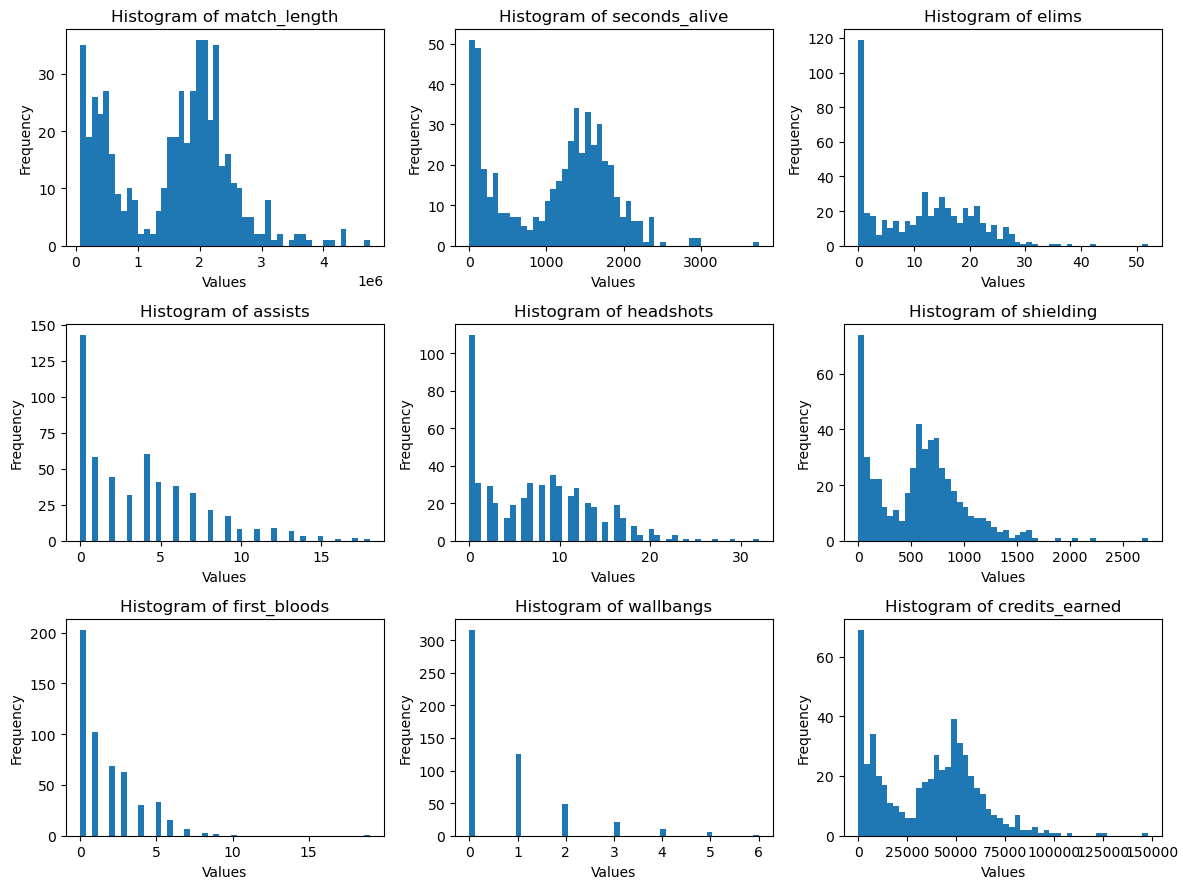

In [355]:
import matplotlib.pyplot as plt

columns = ['match_length','seconds_alive','elims','assists','headshots','shielding','first_bloods','wallbangs','credits_earned']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))

# Iterate over the columns and plot histograms in the grid
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.hist(df[column], bins=50)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

# Adjust spacing between subplots
plt.tight_layout()

# Display the grid of histograms
plt.show()

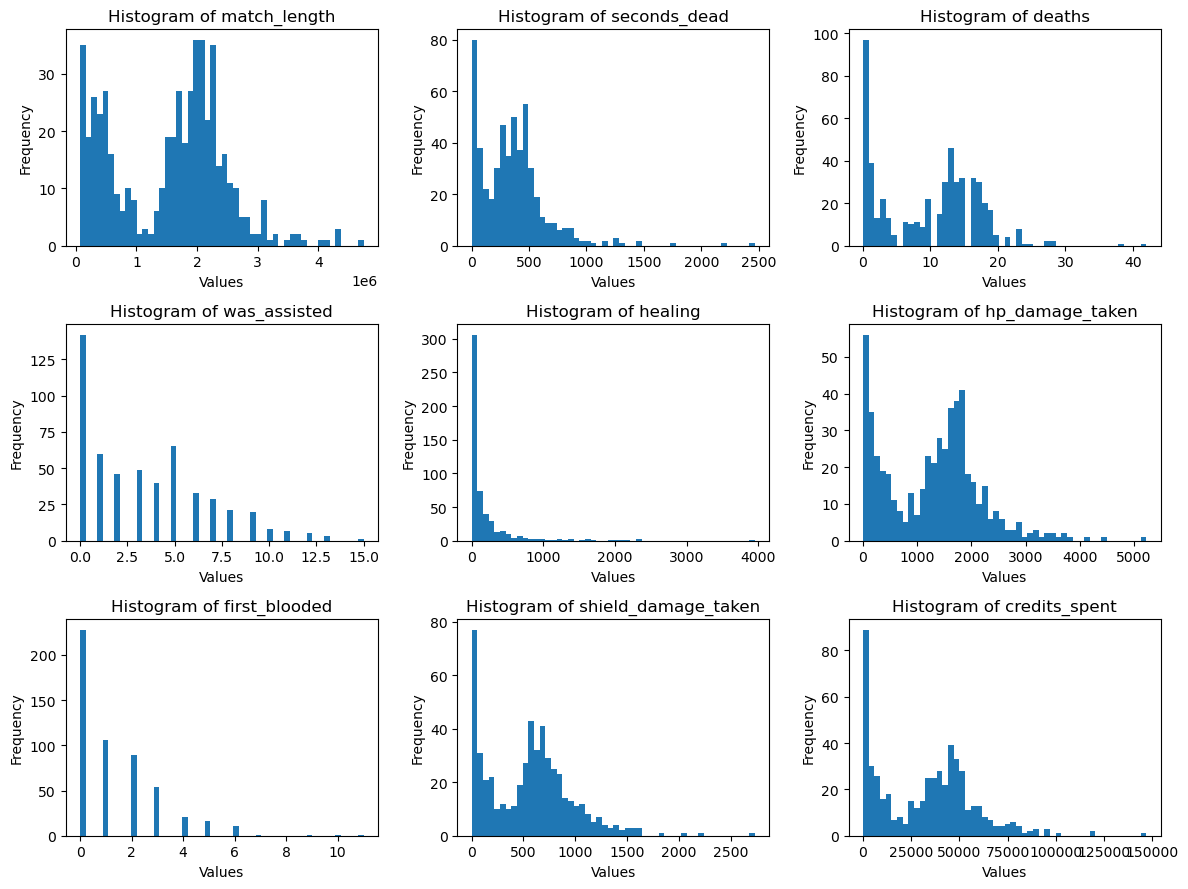

In [356]:
columns = ['match_length','seconds_dead','deaths','was_assisted', 'healing','hp_damage_taken','first_blooded','shield_damage_taken','credits_spent']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))

# Iterate over the columns and plot histograms in the grid
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.hist(df[column], bins=50)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

# Adjust spacing between subplots
plt.tight_layout()

# Display the grid of histograms
plt.show()

## win vs loss
- this is one of my target questions: is it possible/how easy is it to predict match outcome 
- try seeing the wins vs losses 
- b/c of the class imbalance, downsample to make the histograms comparable

### thoughts
- generally the features do not seem very seperable linearlly
- Some are a little seperable ("deaths"?), I def expected more clear distictions esp. when it comes to deaths/eliminations is that is a big part of what determines the game
- I also expected that players that are sheilding more, taking less damage, alive longer, longer matches, to generally be winning matches but that doesn't really seem to be the case

In [357]:
class_counts = df['result'].value_counts()
class_counts

win     334
loss    169
draw     26
Name: result, dtype: int64

In [358]:
# going to remove the draw for now
df_no_draw = df[df['result'] != 'draw']
df_no_draw_counts = df_no_draw['result'].value_counts()
df_no_draw_counts

win     334
loss    169
Name: result, dtype: int64

In [359]:
# downsampling for now
class_win = df_no_draw[df_no_draw['result'] == 'win']
class_loss = df_no_draw[df_no_draw['result'] == 'loss']

num_samples_class_win = len(class_win)
num_samples_class_loss = len(class_loss)

downsampled_class_win = class_win.sample(n=num_samples_class_loss, random_state=42)
downsampled_class_loss = class_loss

# Combine the downsampled classes into a new data frame
downsampled_df = pd.concat([downsampled_class_win, downsampled_class_loss])

downsampled_df = downsampled_df.sample(frac=1, random_state=42).reset_index(drop=True)
downsampled_df

,id,map_id,created_at,result,score,character_id,user_id,match_length,start_time,end_time,...,wallbangs,first_bloods,seconds_dead,was_assisted,credits_spent,first_blooded,seconds_alive,credits_earned,hp_damage_taken,shield_damage_taken
0,4539,137,2023-05-05 06:59:27.978000+00:00,win,13-5,36,1012,1803633,6789205,8592838,...,0.0,0.0,802.0,3.0,35050.0,0.0,940.0,39600.0,2613.0,1202.0
1,1527,32,2023-03-01 15:31:27.897000+00:00,loss,18-20,49,998,3748000,0,3748000,...,2.0,19.0,827.0,15.0,87642.0,6.0,2886.0,89192.0,3415.0,2199.0
2,4527,34,2023-05-05 06:28:07.950000+00:00,loss,10-13,44,1012,2218000,6454000,8672000,...,1.0,6.0,791.0,2.0,39750.0,0.0,1388.0,45250.0,2423.0,1184.0
3,4427,136,2023-05-05 01:03:37.605000+00:00,win,13-8,51,1010,2146004,12119023,14265027,...,1.0,8.0,446.0,5.0,34400.0,4.0,1552.0,37150.0,1653.0,955.0
4,4443,33,2023-05-05 01:51:28.638000+00:00,loss,6-13,48,1012,1713000,9243000,10956000,...,0.0,1.0,374.0,1.0,47150.0,1.0,1306.0,48650.0,1620.0,659.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,4521,136,2023-05-05 06:14:04.835000+00:00,loss,5-13,44,1016,1866005,5222014,7088019,...,2.0,2.0,603.0,1.0,32700.0,2.0,1111.0,32900.0,1855.0,575.0
334,4570,134,2023-05-05 07:36:01.430000+00:00,win,5-3,44,1010,1014000,11187999,12201999,...,0.0,1.0,699.0,0.0,50.0,0.0,264.0,100.0,1134.0,260.0
335,2710,34,2023-03-28 01:44:14.151000+00:00,win,7-2,44,1012,326007,20744466,21070473,...,0.0,0.0,90.0,0.0,4600.0,0.0,142.0,11550.0,295.0,128.0
336,2780,136,2023-03-28 03:21:13.711000+00:00,loss,4-5,37,1010,161015,13574285,13735300,...,0.0,0.0,26.0,0.0,1400.0,0.0,78.0,3400.0,100.0,25.0


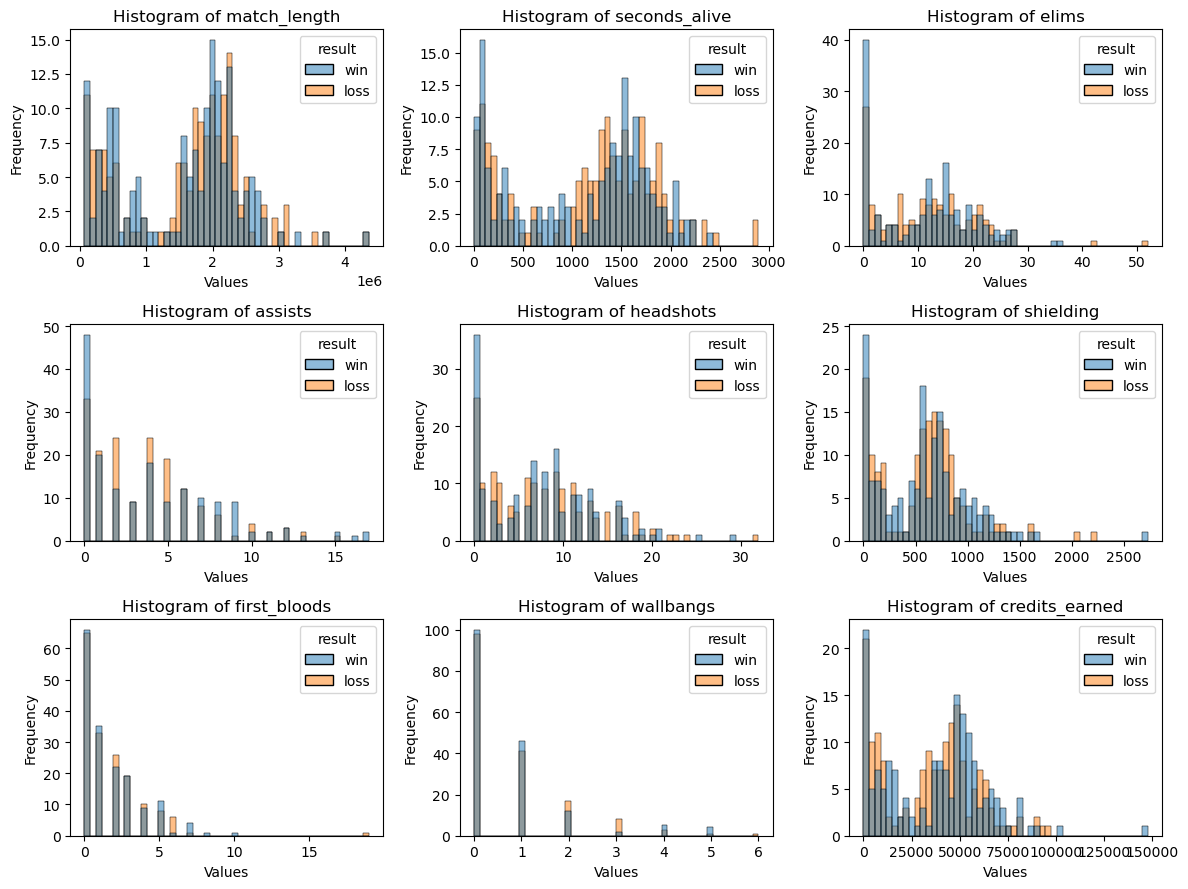

In [360]:
import seaborn as sns

# Specify the class label column
class_label = 'result'
columns = ['match_length','seconds_alive','elims','assists','headshots','shielding','first_bloods','wallbangs','credits_earned']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))

# Iterate over the columns and plot histograms in the grid
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=downsampled_df, x=column, hue=class_label, ax=ax, bins=50)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

# Adjust spacing between subplots
plt.tight_layout()

# Display the grid of histograms
plt.show()


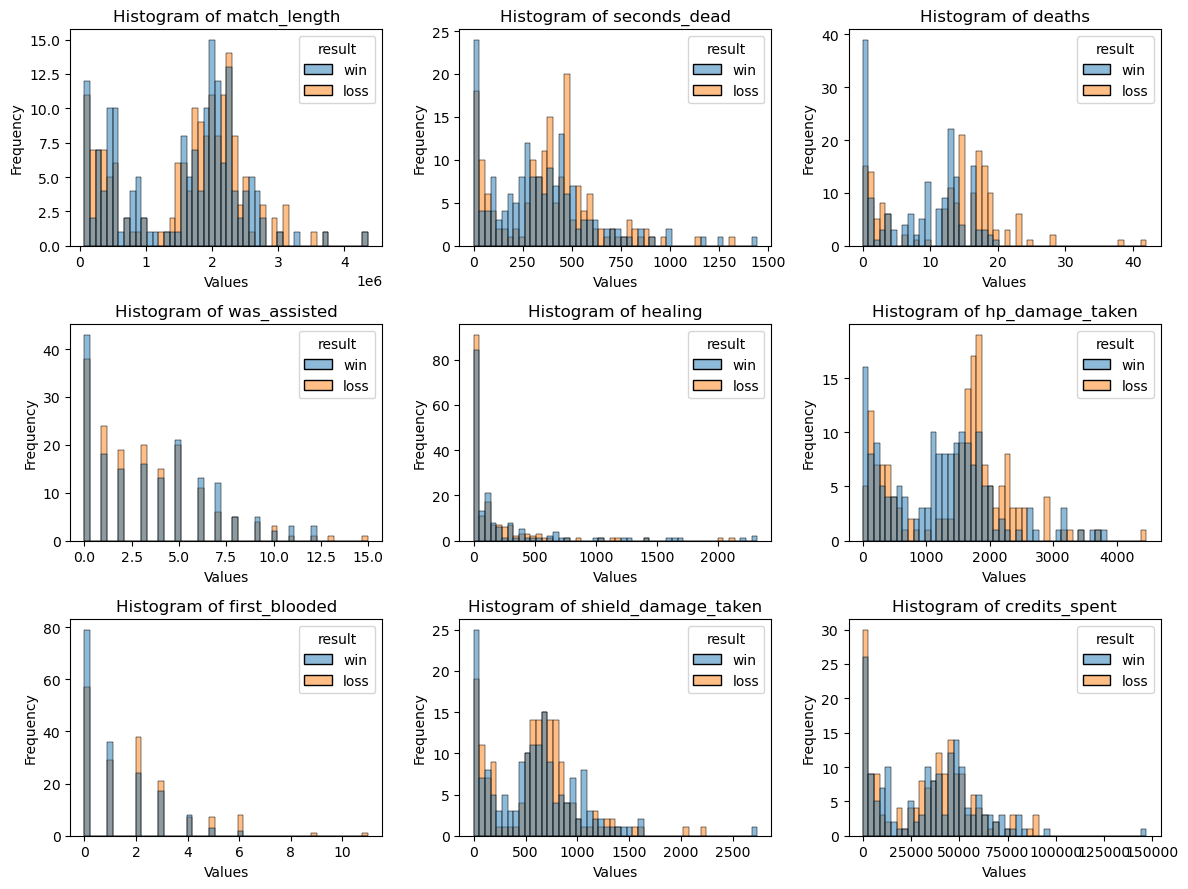

In [361]:
import seaborn as sns

# Specify the class label column
class_label = 'result'
columns = ['match_length','seconds_dead','deaths','was_assisted', 'healing','hp_damage_taken','first_blooded','shield_damage_taken','credits_spent']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))

# Iterate over the columns and plot histograms in the grid
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=downsampled_df, x=column, hue=class_label, ax=ax, bins=50)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

# Adjust spacing between subplots
plt.tight_layout()

# Display the grid of histograms
plt.show()

In [362]:
p_df_1 = downsampled_df[['result','match_length','seconds_alive','elims','assists']]
p_df_2 = downsampled_df[['result','headshots','shielding','first_bloods','wallbangs','credits_earned']]

n_df_1 = downsampled_df[['result','match_length','seconds_dead','deaths','was_assisted']]
n_df_2 = downsampled_df[['result','healing','hp_damage_taken','first_blooded','shield_damage_taken','credits_spent']]

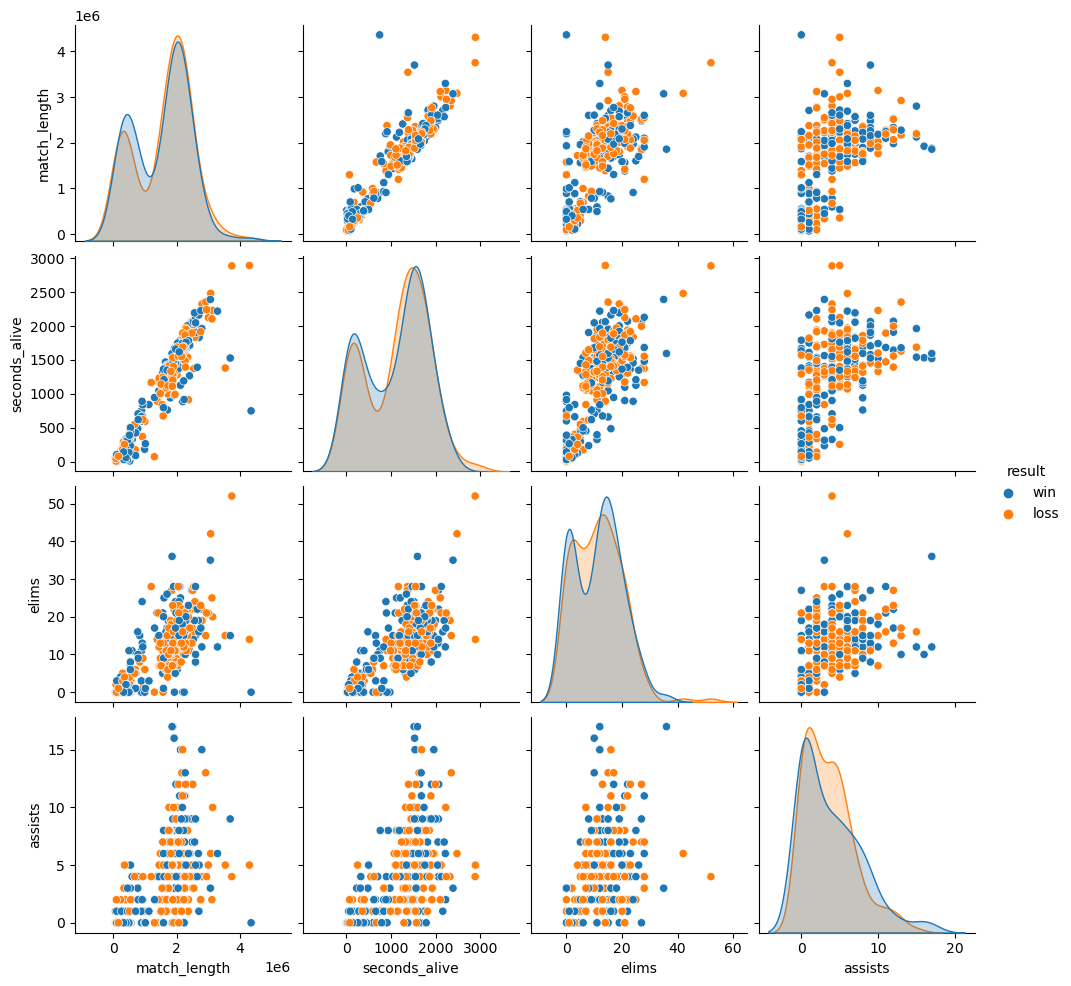

In [363]:
sns.pairplot(p_df_1,hue='result')

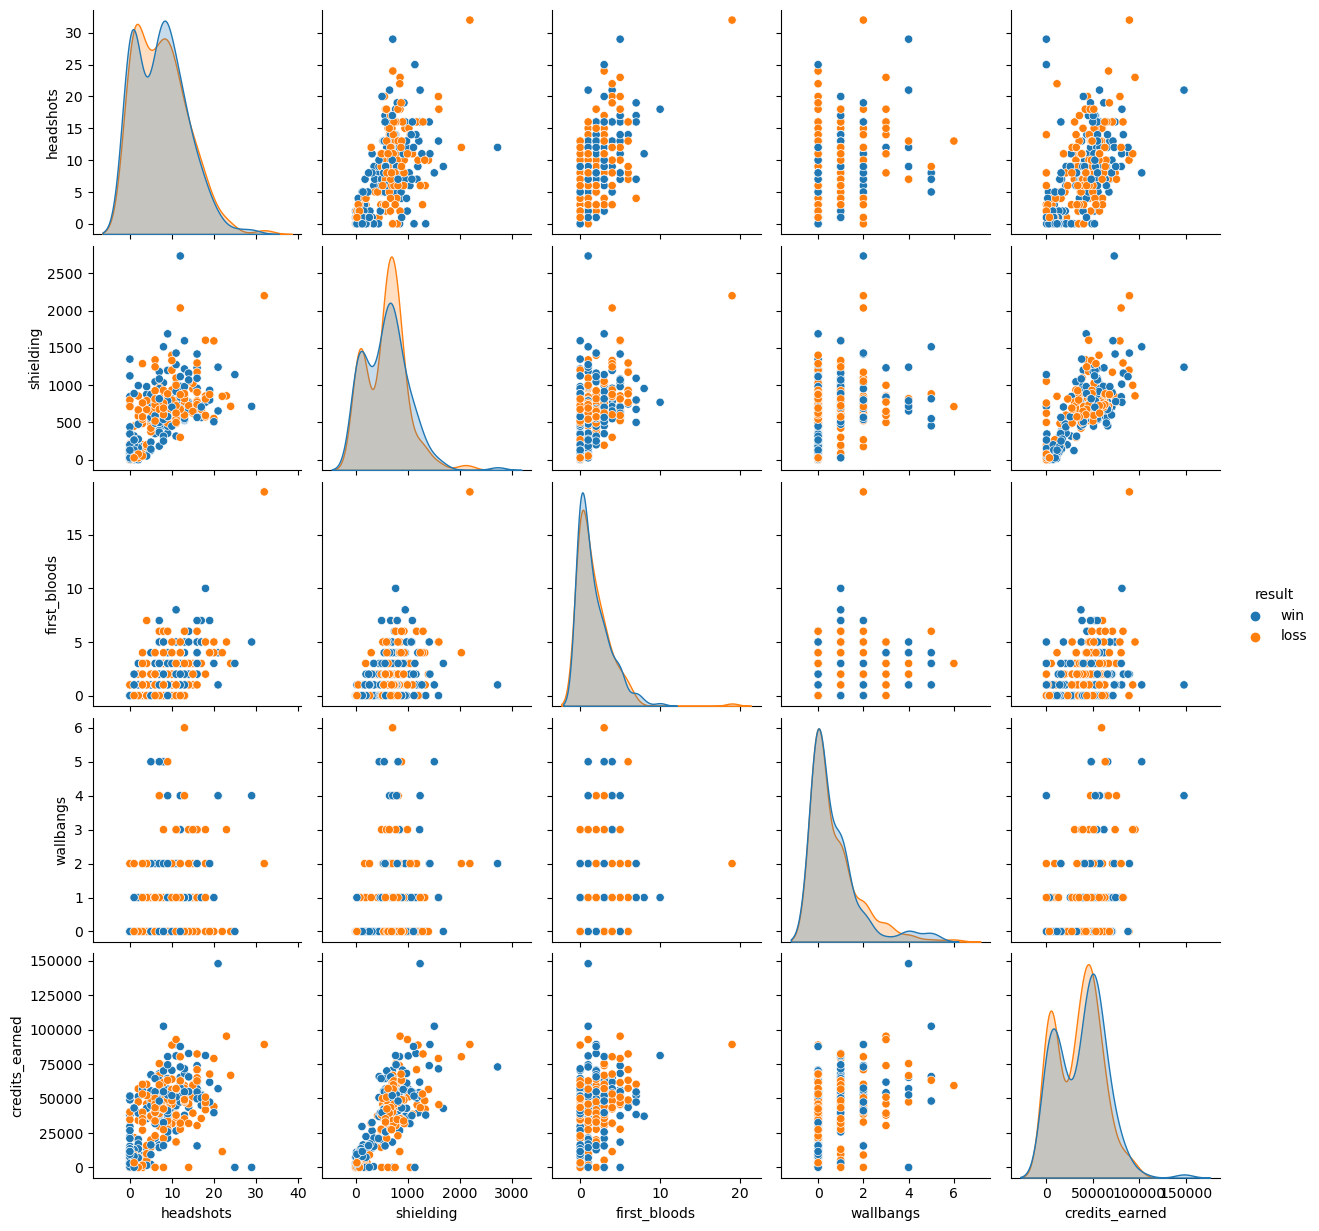

In [364]:
sns.pairplot(p_df_2,hue='result')

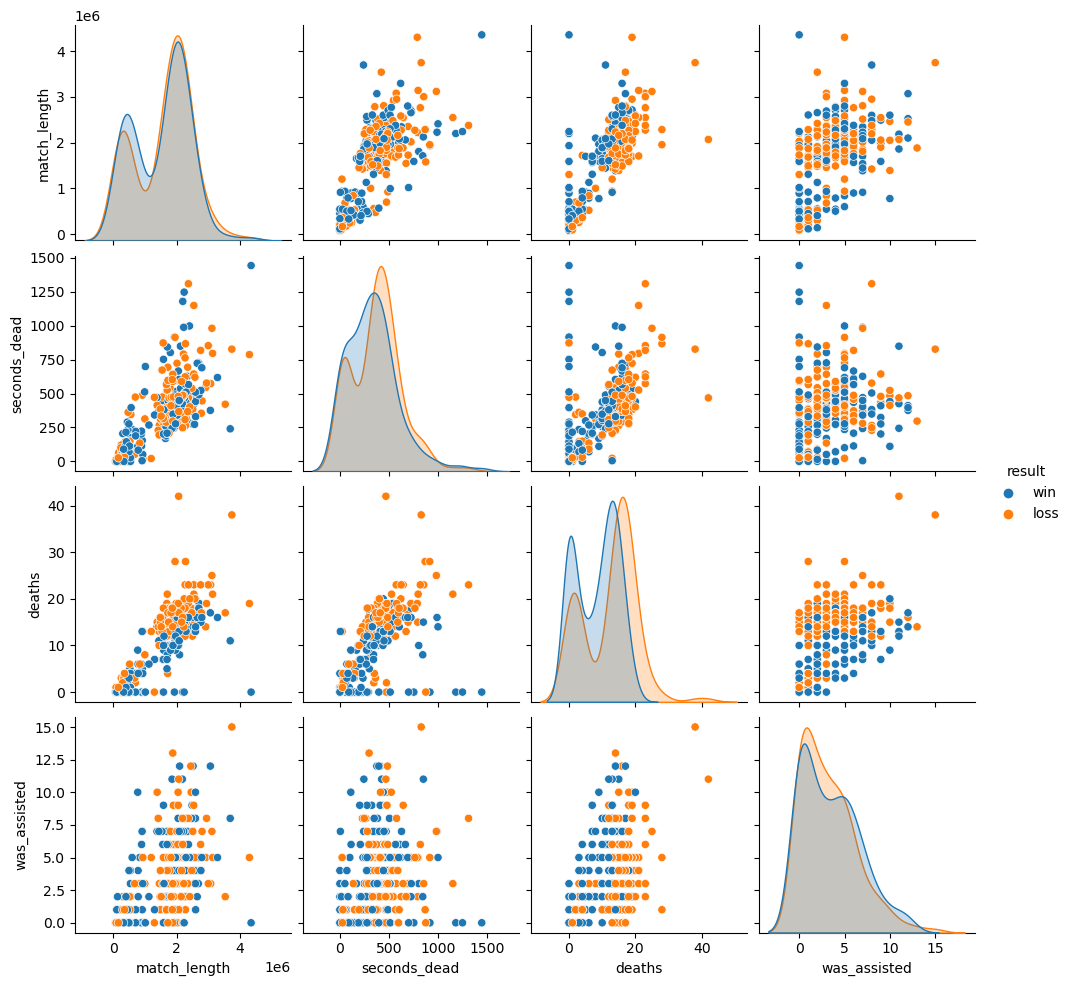

In [365]:
sns.pairplot(n_df_1,hue='result')

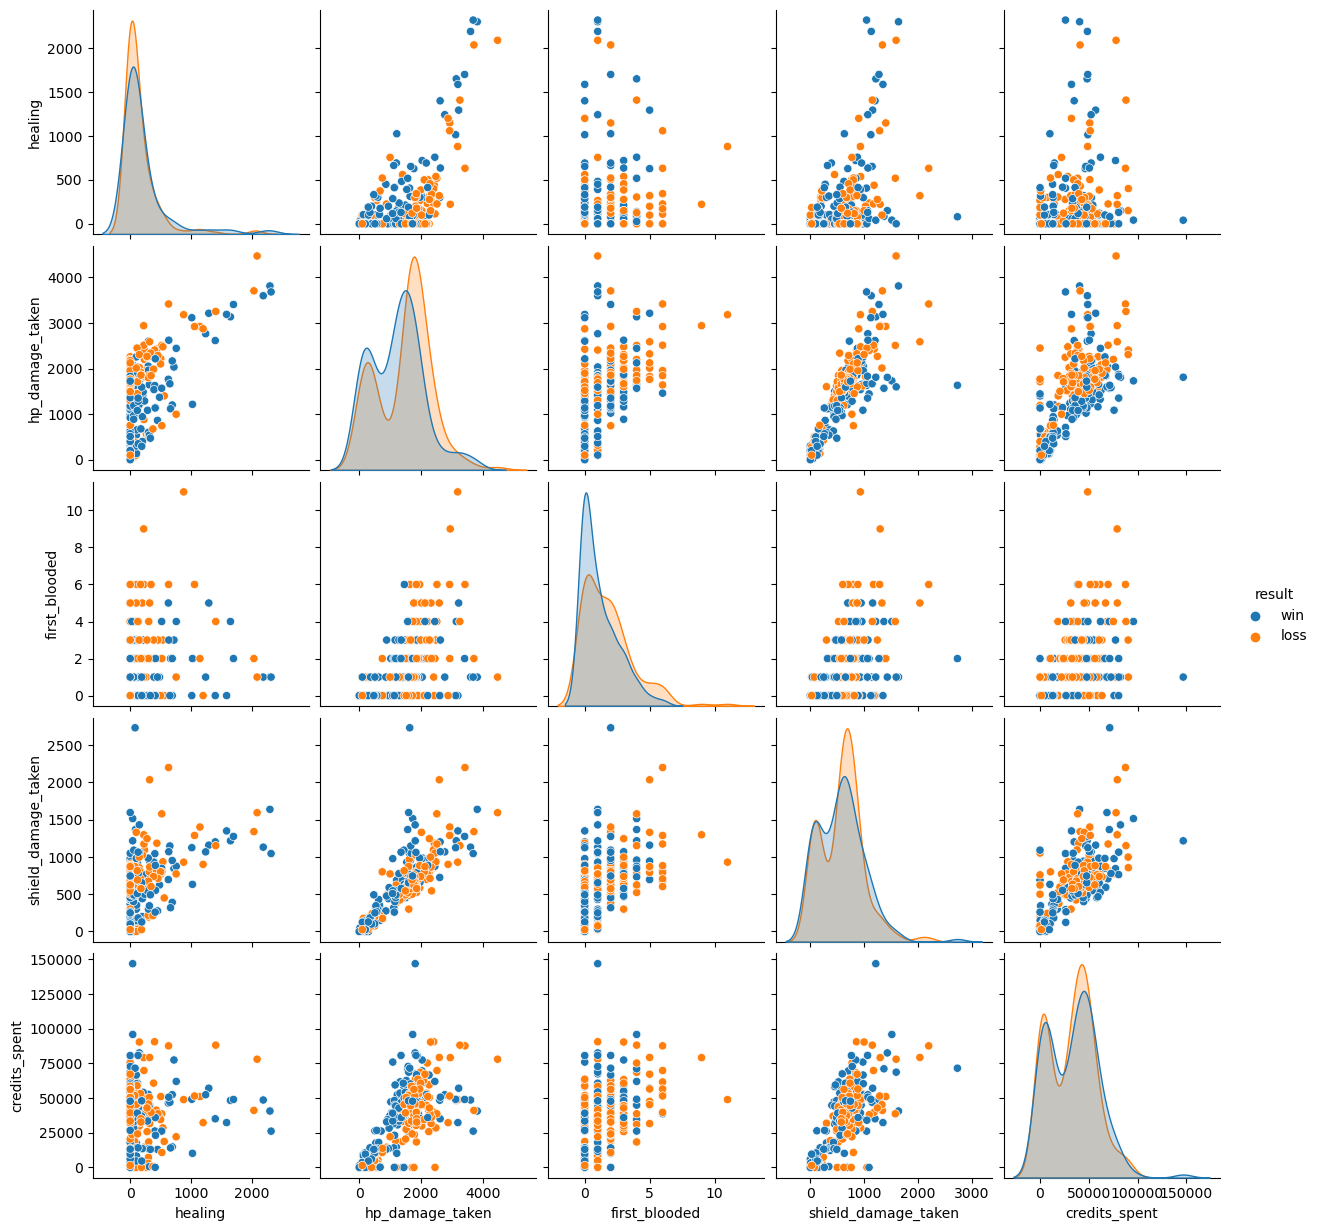

In [366]:
sns.pairplot(n_df_2,hue='result')

## more thoughts
- Initially I thought that clustering would be a good place to start b/c I want to see if I can group similar games (similar in the sense that there are winning games and losing games, or just certain playstyles, etc.)
- But after looking at these features it doesnt really seem "globular" or like blobs which is when I think clustering works well
- gaussian mixture?

## correlation analysis

- some features are obviously correlated, like headshots and elims
- but a lot of them seem not that correlated, like deaths and healing??

In [367]:
corr_df = downsampled_df[['match_length','seconds_dead','deaths','was_assisted', 'healing','hp_damage_taken','first_blooded','shield_damage_taken','credits_spent','seconds_alive','elims','assists','headshots','shielding','first_bloods','credits_earned']]


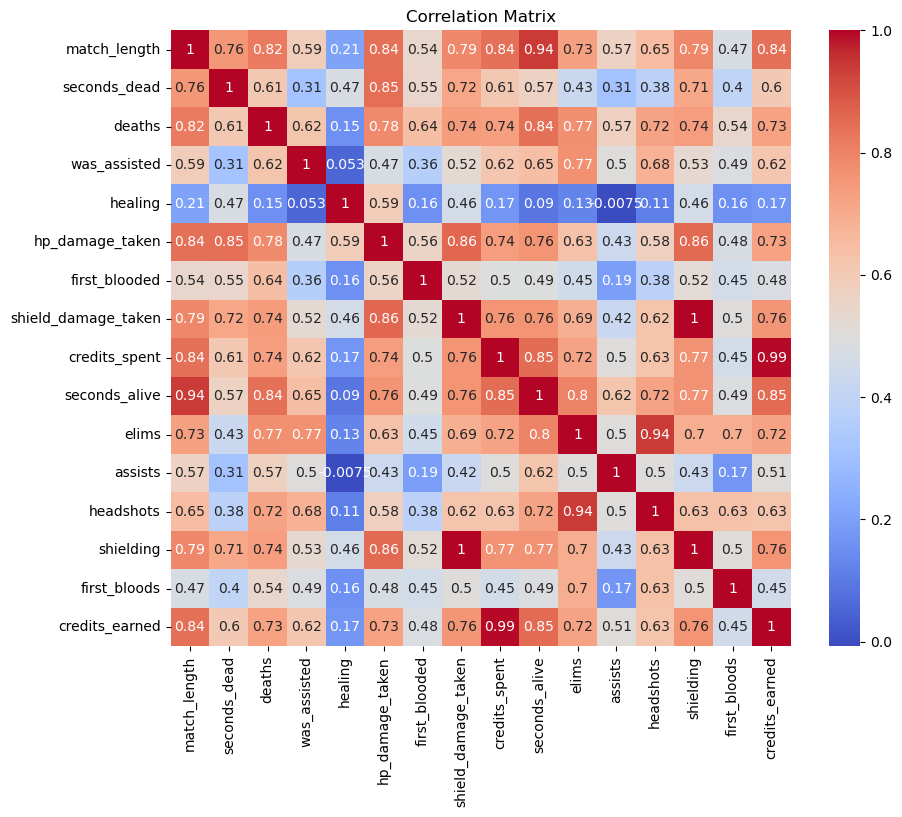

In [368]:
correlation_matrix = corr_df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## 2 users
- taking the top users (about 100 games each) and seeing if the data for those users is the same or not

### thoughts
- definitely seems more seperable (user vs user) than game outcome
- possibly a good sign for classifying different types of gameplay styles?
- similar but not perfect w/l ratios

In [369]:
df

,id,map_id,created_at,result,score,character_id,user_id,match_length,start_time,end_time,...,wallbangs,first_bloods,seconds_dead,was_assisted,credits_spent,first_blooded,seconds_alive,credits_earned,hp_damage_taken,shield_damage_taken
0,4633,136,2023-05-05 10:04:15.097000+00:00,win,13-3,42,1006,895000,0,895000,...,0.0,2.0,162.0,3.0,29060.0,1.0,677.0,33110.0,446.0,170.0
1,4631,32,2023-05-05 10:01:25.781000+00:00,loss,9-13,1411,1006,2071000,2135000,4206000,...,3.0,2.0,367.0,1.0,33400.0,1.0,1571.0,39350.0,1688.0,634.0
2,4630,33,2023-05-05 09:59:24.229000+00:00,win,13-4,42,1006,1519000,464000,1983000,...,0.0,6.0,248.0,9.0,25450.0,1.0,1233.0,38700.0,1165.0,445.0
3,4613,28,2023-05-05 09:19:39.378000+00:00,win,14-12,45,1011,2680000,16735999,19415999,...,0.0,3.0,463.0,4.0,44500.0,0.0,2057.0,44750.0,2032.0,1009.0
4,4612,32,2023-05-05 09:17:04.490000+00:00,win,13-10,52,1011,2237000,14434999,16671999,...,0.0,1.0,609.0,6.0,38700.0,6.0,1456.0,41100.0,1914.0,817.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,1466,34,2023-02-27 21:24:45.202000+00:00,win,13-8,48,1010,2037000,0,2037000,...,1.0,5.0,443.0,7.0,34015.0,1.0,1578.0,37515.0,1676.0,1050.0
530,1464,31,2023-02-27 21:21:35.997000+00:00,win,14-12,35,1011,2506999,0,2506999,...,1.0,2.0,431.0,8.0,56550.0,2.0,2049.0,57350.0,2223.0,915.0
531,1463,134,2023-02-27 21:19:04.449000+00:00,win,13-11,35,1011,2376000,4000,2380000,...,2.0,1.0,566.0,6.0,71534.0,2.0,1783.0,72884.0,1632.0,2732.0
532,1462,33,2023-02-27 21:07:02.155000+00:00,win,13-4,34,1018,1632779,8296875,9929654,...,0.0,3.0,373.0,1.0,36530.0,1.0,1231.0,39680.0,1396.0,1007.0


In [370]:
user_2_df = df[(df['user_id'] == 1012) | (df['user_id'] == 1013)]
user_2_df = user_2_df.reset_index(drop=True)

In [371]:
user_2_df

,id,map_id,created_at,result,score,character_id,user_id,match_length,start_time,end_time,...,wallbangs,first_bloods,seconds_dead,was_assisted,credits_spent,first_blooded,seconds_alive,credits_earned,hp_damage_taken,shield_damage_taken
0,4594,134,2023-05-05 08:06:55.021000+00:00,win,12-10,44,1013,386000,17749000,18135000,...,0.0,0.0,114.0,0.0,3270.0,0.0,30.0,7470.0,100.0,8.0
1,4593,134,2023-05-05 08:06:32.290000+00:00,win,8-7,34,1013,472000,17102000,17574000,...,0.0,1.0,208.0,1.0,305.0,0.0,70.0,450.0,141.0,8.0
2,4592,134,2023-05-05 08:06:02.001000+00:00,loss,5-6,44,1013,555000,16431000,16986000,...,0.0,0.0,345.0,0.0,6476.0,0.0,114.0,6876.0,200.0,149.0
3,4590,134,2023-05-05 08:03:34.318000+00:00,win,7-6,44,1013,246000,14702000,14948000,...,0.0,0.0,50.0,0.0,9271.0,0.0,89.0,14371.0,228.0,60.0
4,4589,134,2023-05-05 08:03:04.597000+00:00,win,11-0,37,1013,486000,13911000,14397000,...,0.0,0.0,102.0,0.0,5500.0,1.0,30.0,5650.0,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2578,33,2023-03-27 20:44:50.264000+00:00,win,9-3,46,1012,300000,3826000,4126000,...,0.0,0.0,33.0,0.0,5000.0,0.0,246.0,8650.0,330.0,200.0
194,2577,33,2023-03-27 20:43:57.740000+00:00,win,6-1,37,1012,686000,3103000,3789000,...,0.0,0.0,208.0,0.0,12650.0,0.0,416.0,16500.0,936.0,311.0
195,2576,28,2023-03-27 20:42:13.253000+00:00,loss,5-12,45,1012,332000,2323000,2655000,...,0.0,0.0,68.0,0.0,7250.0,0.0,205.0,9900.0,500.0,195.0
196,2575,28,2023-03-27 20:41:18.556000+00:00,loss,4-9,37,1012,373000,1930000,2303000,...,0.0,0.0,146.0,1.0,2900.0,0.0,168.0,3650.0,596.0,217.0


In [372]:
class_counts = user_2_df.groupby('user_id')['result'].value_counts()
class_counts

user_id  result
1012     win       64
         loss      39
         draw       3
1013     win       58
         loss      24
         draw      10
Name: result, dtype: int64

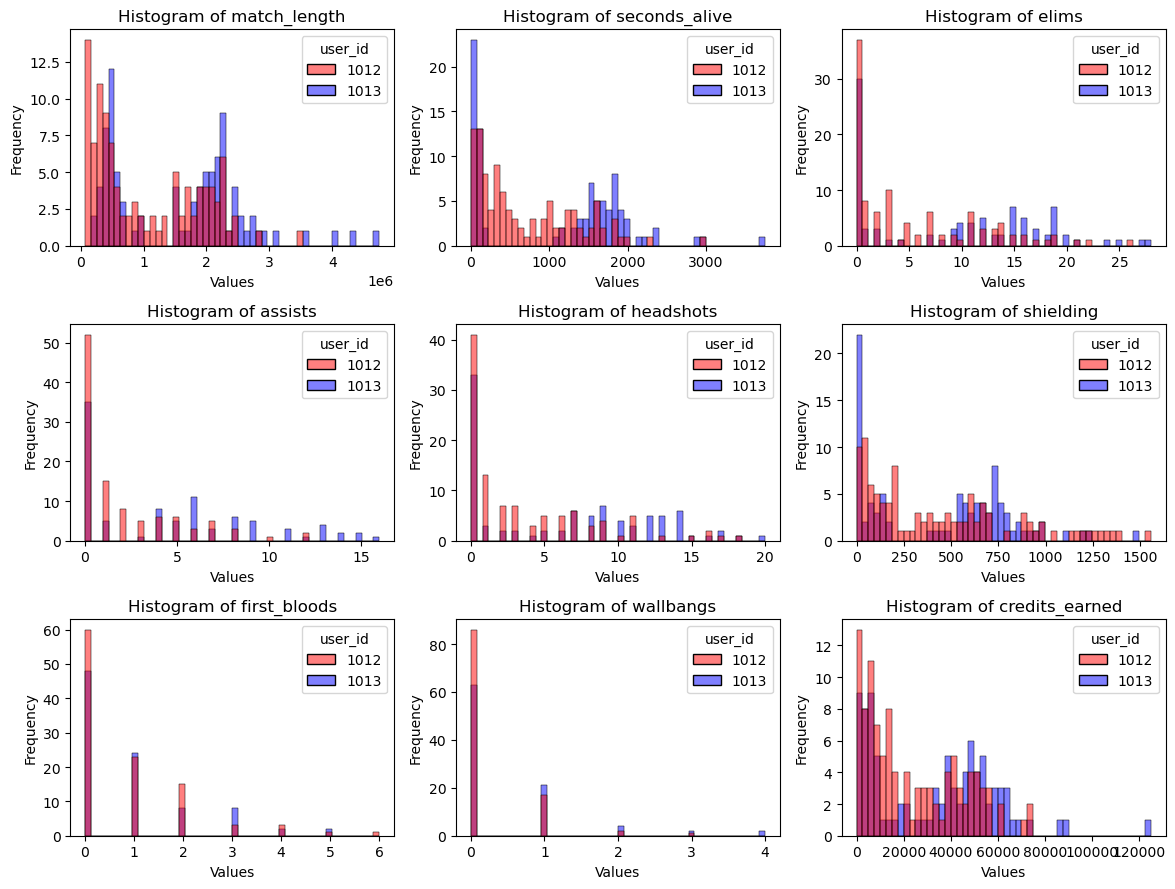

In [373]:
custom_palette = ['red', 'blue']
# pick the class label column
class_label = 'user_id'
columns = ['match_length','seconds_alive','elims','assists','headshots','shielding','first_bloods','wallbangs','credits_earned']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))

for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=user_2_df, x=column, hue=class_label, ax=ax, bins=50, palette=custom_palette)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

plt.tight_layout()

plt.show()

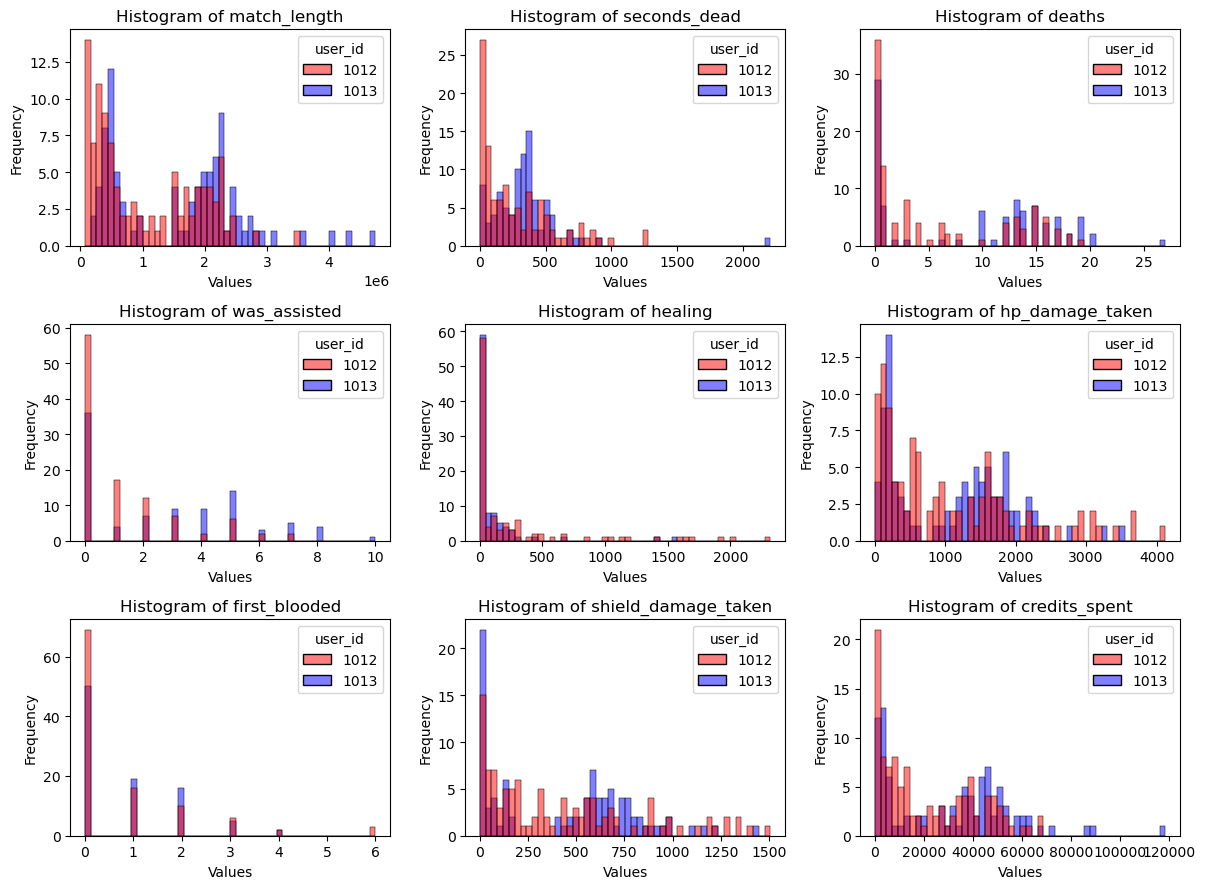

In [374]:
custom_palette = ['red', 'blue']
# pick the class label column
class_label = 'user_id'
columns = ['match_length','seconds_dead','deaths','was_assisted', 'healing','hp_damage_taken','first_blooded','shield_damage_taken','credits_spent']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))

for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=user_2_df, x=column, hue=class_label, ax=ax, bins=50, palette=custom_palette)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

plt.tight_layout()

plt.show()

In [379]:

p_user_2_df_1 = user_2_df[['user_id','match_length','seconds_alive','elims','assists']]
p_user_2_df_2 = user_2_df[['user_id','headshots','shielding','first_bloods','wallbangs','credits_earned']]

n_user_2_df_1 = user_2_df[['user_id','match_length','seconds_dead','deaths','was_assisted']]
n_user_2_df_2 = user_2_df[['user_id','healing','hp_damage_taken','first_blooded','shield_damage_taken','credits_spent']]


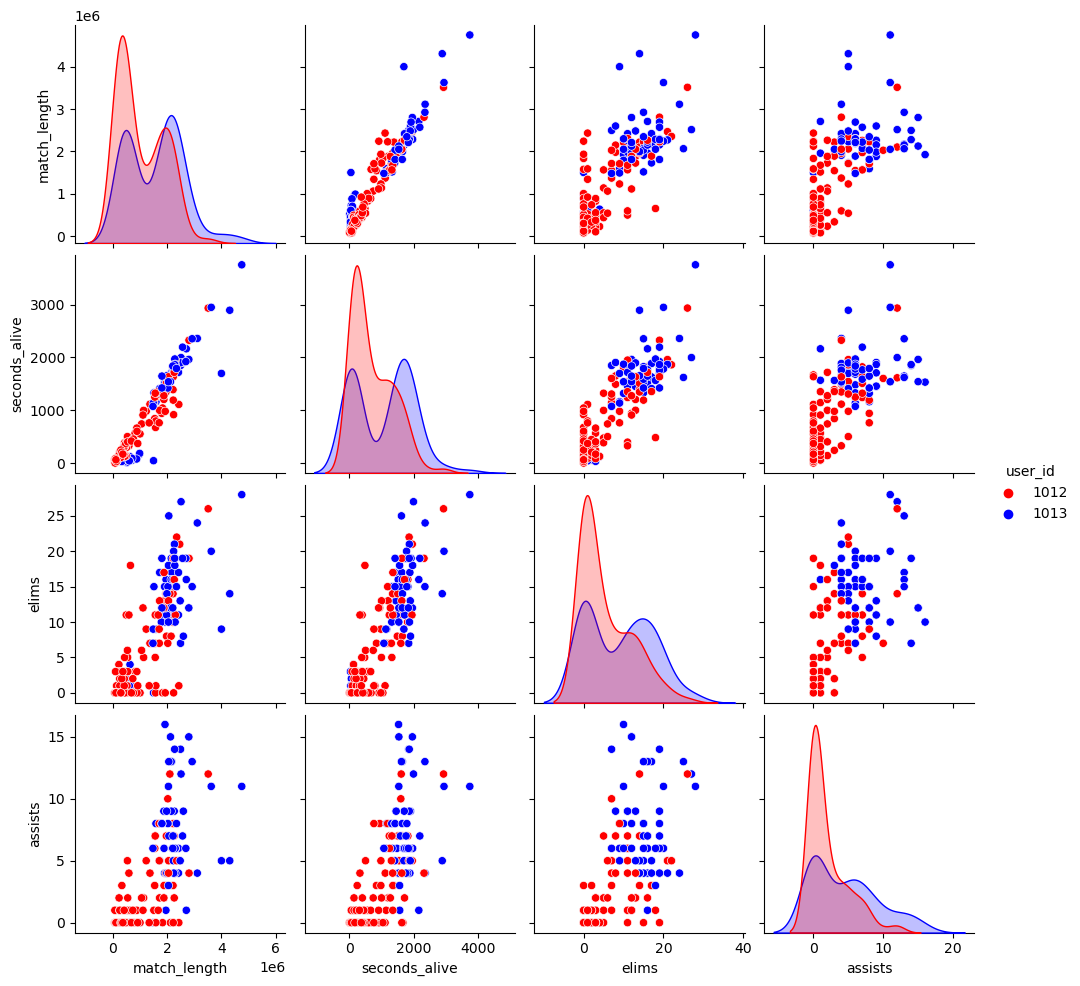

In [380]:
sns.pairplot(p_user_2_df_1,hue='user_id', palette=custom_palette)

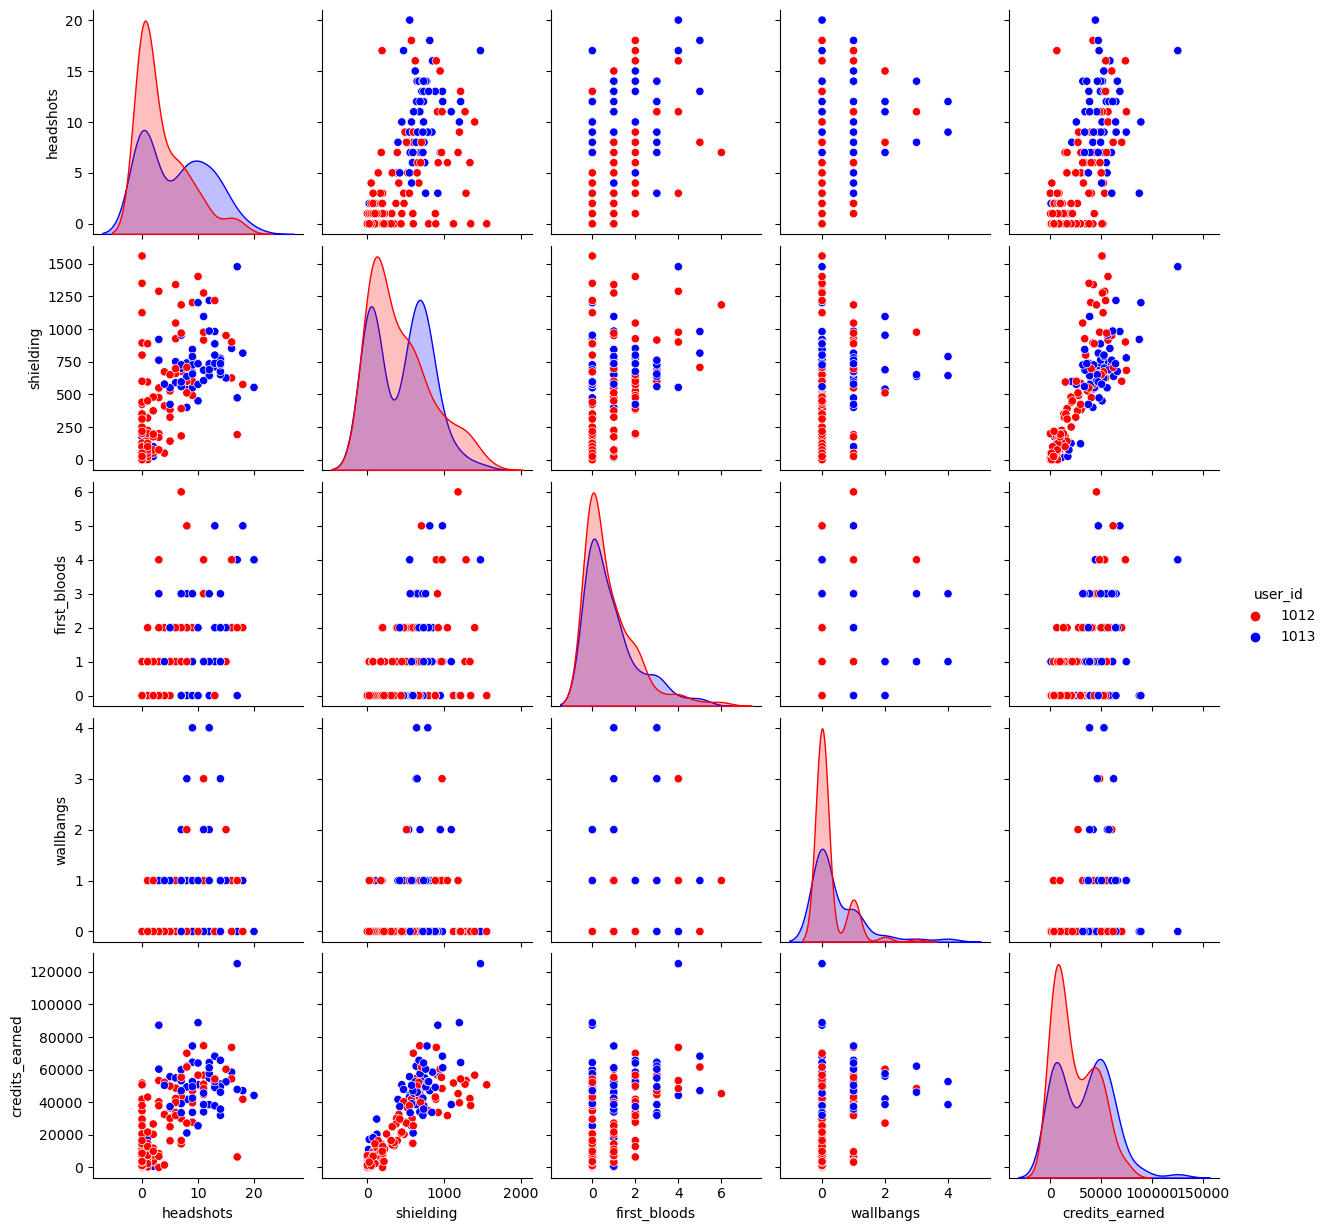

In [381]:
sns.pairplot(p_user_2_df_2,hue='user_id', palette=custom_palette)

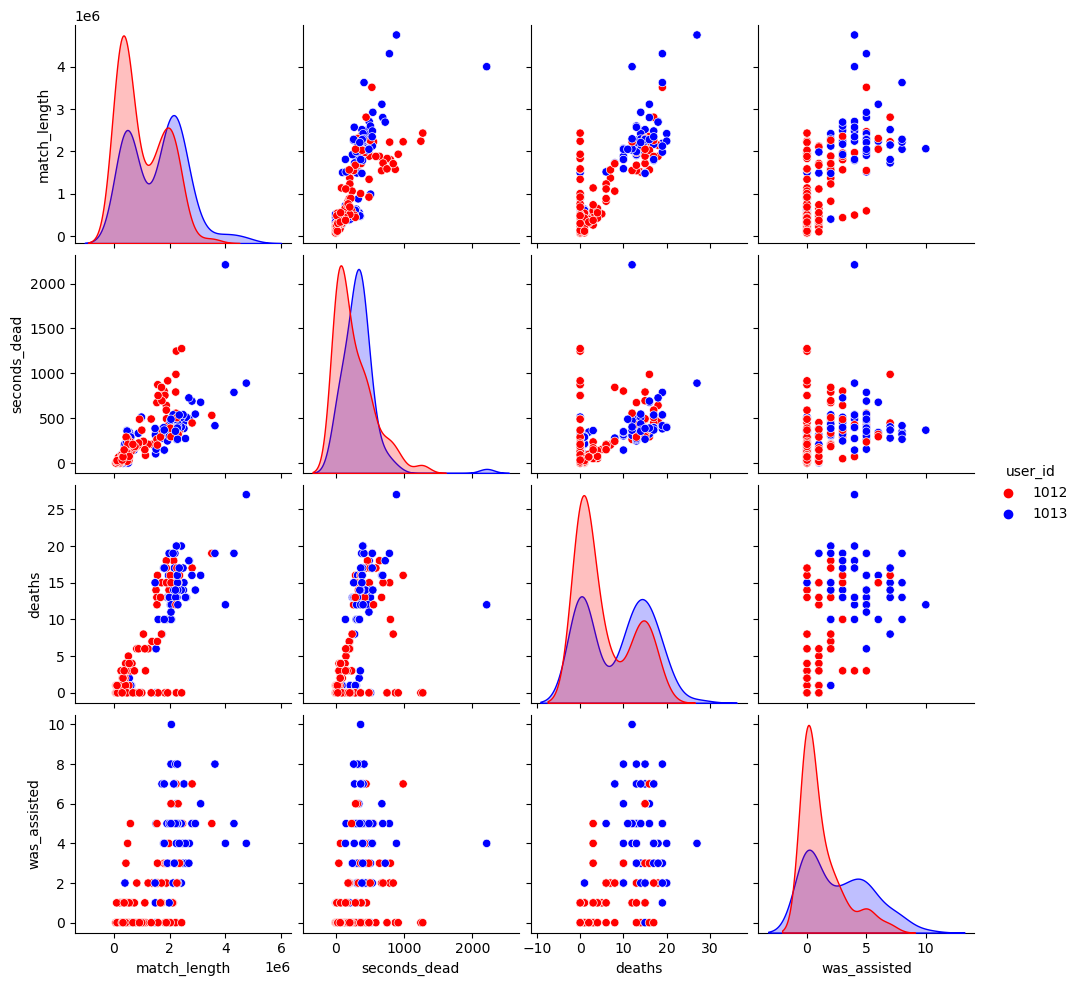

In [382]:
sns.pairplot(n_user_2_df_1,hue='user_id', palette=custom_palette)

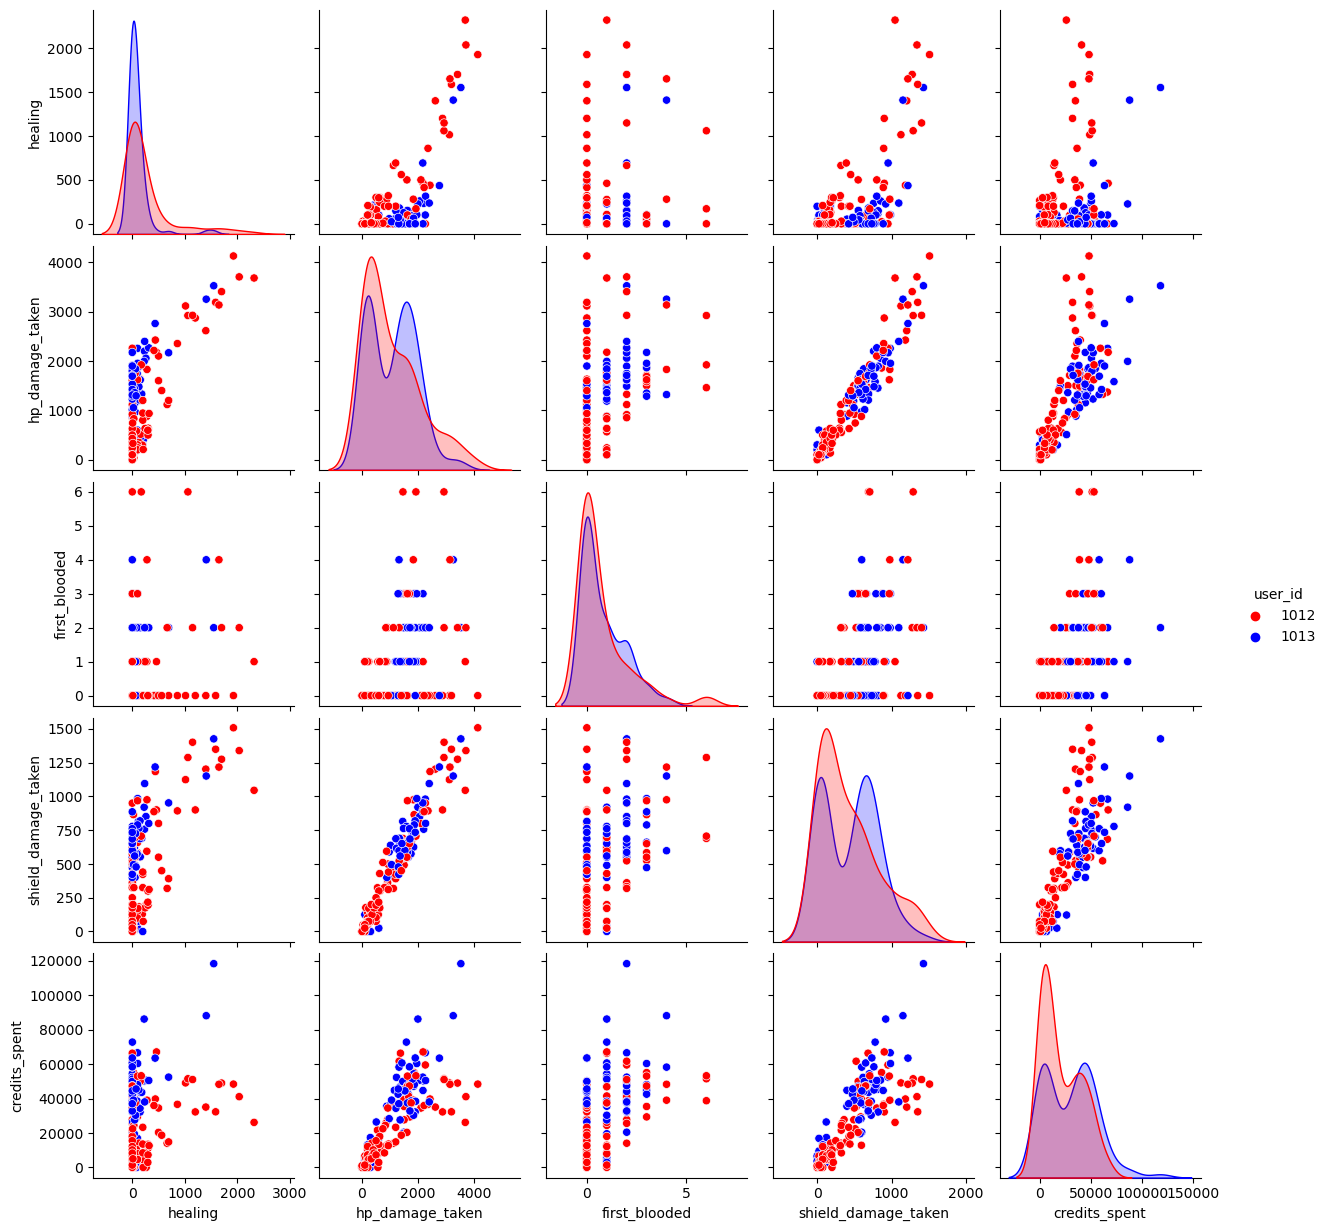

In [383]:
sns.pairplot(n_user_2_df_2,hue='user_id', palette=custom_palette)

## PCA

-numerical, results


In [416]:
numerical_df = df[['match_length','seconds_dead','deaths','was_assisted','healing','hp_damage_taken','first_blooded','shield_damage_taken','credits_spent','seconds_alive','elims','assists','headshots','shielding','first_bloods','wallbangs','credits_earned']]
numerical_df

,match_length,seconds_dead,deaths,was_assisted,healing,hp_damage_taken,first_blooded,shield_damage_taken,credits_spent,seconds_alive,elims,assists,headshots,shielding,first_bloods,wallbangs,credits_earned
0,895000,162.0,3.0,3.0,23.0,446.0,1.0,170.0,29060.0,677.0,9.0,2.0,6.0,220.0,2.0,0.0,33110.0
1,2071000,367.0,17.0,1.0,0.0,1688.0,1.0,634.0,33400.0,1571.0,21.0,0.0,15.0,648.0,2.0,3.0,39350.0
2,1519000,248.0,8.0,9.0,320.0,1165.0,1.0,445.0,25450.0,1233.0,32.0,3.0,17.0,519.0,6.0,0.0,38700.0
3,2680000,463.0,12.0,4.0,4.0,2032.0,0.0,1009.0,44500.0,2057.0,14.0,12.0,10.0,1009.0,3.0,0.0,44750.0
4,2237000,609.0,16.0,6.0,164.0,1914.0,6.0,817.0,38700.0,1456.0,15.0,6.0,10.0,817.0,1.0,0.0,41100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,2037000,443.0,11.0,7.0,0.0,1676.0,1.0,1050.0,34015.0,1578.0,12.0,9.0,7.0,1083.0,5.0,1.0,37515.0
525,2506999,431.0,19.0,8.0,289.0,2223.0,2.0,915.0,56550.0,2049.0,24.0,8.0,15.0,939.0,2.0,1.0,57350.0
526,2376000,566.0,16.0,6.0,80.0,1632.0,2.0,2732.0,71534.0,1783.0,23.0,6.0,12.0,2732.0,1.0,2.0,72884.0
527,1632779,373.0,14.0,1.0,50.0,1396.0,1.0,1007.0,36530.0,1231.0,11.0,6.0,8.0,1007.0,3.0,0.0,39680.0


In [417]:
nan_rows = df[df.isna().any(axis=1)]

nan_rows

,index,id,map_id,created_at,result,score,character_id,user_id,match_length,start_time,...,wallbangs,first_bloods,seconds_dead,was_assisted,credits_spent,first_blooded,seconds_alive,credits_earned,hp_damage_taken,shield_damage_taken


In [428]:
from sklearn.decomposition import PCA

n_components = 2  # number of principal components
pca = PCA(n_components=n_components)

pca.fit(numerical_df)

transformed_data = pca.transform(numerical_df)

# dataframe to hold the transformed data
columns = [f"PC{i+1}" for i in range(n_components)]
transformed_df = pd.DataFrame(transformed_data, columns=columns)

transformed_df

,PC1,PC2
0,-6.468106e+05,16858.356005
1,5.288221e+05,-13509.744627
2,-2.308509e+04,-1704.376456
3,1.137880e+06,-21544.357473
4,6.948954e+05,-13925.106534
...,...,...
524,4.948114e+05,-13308.118863
525,9.655307e+05,1453.287515
526,8.352955e+05,27256.300828
527,9.090628e+04,3011.844454


In [434]:
# one-hot encode the class column
class_one_hot = pd.get_dummies(df['result'], prefix='result')
class_one_hot

,result_draw,result_loss,result_win
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
524,0,0,1
525,0,0,1
526,0,0,1
527,0,0,1


In [435]:
combine_df = pd.concat([transformed_df, class_one_hot], axis=1)
combine_df

,PC1,PC2,result_draw,result_loss,result_win
0,-6.468106e+05,16858.356005,0,0,1
1,5.288221e+05,-13509.744627,0,1,0
2,-2.308509e+04,-1704.376456,0,0,1
3,1.137880e+06,-21544.357473,0,0,1
4,6.948954e+05,-13925.106534,0,0,1
...,...,...,...,...,...
524,4.948114e+05,-13308.118863,0,0,1
525,9.655307e+05,1453.287515,0,0,1
526,8.352955e+05,27256.300828,0,0,1
527,9.090628e+04,3011.844454,0,0,1


Explained Variance Ratio: [9.99575157e-01 4.20128790e-04]
Principal Components:
PC1: [9.99480529e-01 2.38893168e-04 6.32562292e-06 2.04186074e-06
 9.94111227e-05 7.98833979e-04 9.37057903e-07 3.51467700e-04
 2.24047238e-02 7.18987732e-04 6.87979941e-06 2.34941946e-06
 4.34525336e-06 3.54974865e-04 1.05808621e-06 4.30035326e-07
 2.31350163e-02]
PC2: [-3.22127398e-02 -5.92140305e-04  3.89683380e-05  3.33877951e-05
  3.04466383e-04  2.92359844e-03  5.08552835e-06  4.14778950e-03
  6.92232060e-01  4.52813324e-03  9.90409886e-05  9.29461947e-06
  4.88317199e-05  4.28708940e-03  1.01874975e-05  1.07612506e-05
  7.20910550e-01]


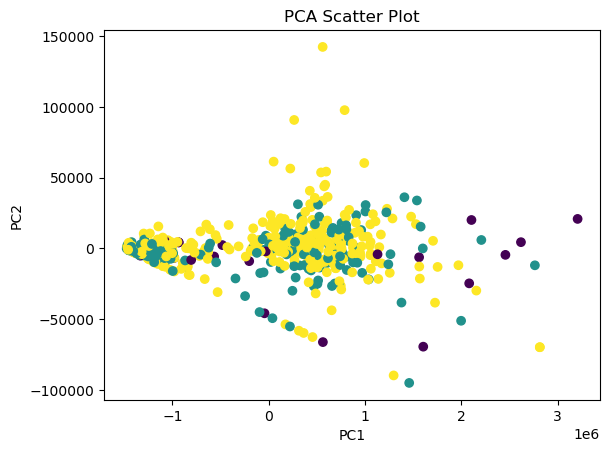

In [442]:
# explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# principal components 
principal_components = pca.components_
print("Principal Components:")
for i, component in enumerate(principal_components):
    print(f"PC{i+1}: {component}")

# plot the transformed data with different colors for each class
class_labels = combine_df[['result_draw', 'result_loss', 'result_win']].idxmax(axis=1)
class_codes = class_labels.astype('category').cat.codes
plt.scatter(combine_df['PC1'], combine_df['PC2'], c=class_codes)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.show()

## PCA

-numerical, user?


## next steps:
- look for more aggregates in the time series data (like ability usage)
- look for other filters/categorical attributes in the data (like gun/weapon type)
- outlier detection?
- what to do about half matches...
- Gaussian mixture models?

## other ideas
- Elo Rating System
- using time series info to fill in gaps in data for half matches?